In [ ]:
# Caminho do arquivo CSV (atualize se necessário)
DATA_PATH = r'C:\Users\keity\OneDrive\Documentos\GitHub\postech\tech-challenge-ia-diagnostico\tech-challenge-ia-diagnostico\data\data.csv'
DATA_PATH


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier

try:
    df = pd.read_csv(DATA_PATH)
    print('Dataset carregado com sucesso:')
    print('Formato:', df.shape)
    display(df.head())
    display(df.tail())
except FileNotFoundError:
    print('Arquivo não encontrado. Verifique o caminho DATA_PATH e se o arquivo existe.')

Dataset carregado com sucesso:
Formato: (569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [21]:
df.describe()


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [22]:
df.groupby('diagnosis').describe()

id                                                          \
           count          mean           std     min       25%       50%   
diagnosis                                                                  
B          357.0  2.654382e+07  1.167397e+08  8913.0  874662.0  908916.0   
M          212.0  3.681805e+07  1.378965e+08  8670.0  861345.0  895366.5   

                                   radius_mean             ...  \
                  75%          max       count       mean  ...   
diagnosis                                                  ...   
B          8812816.00  911320502.0       357.0  12.146524  ...   
M          8911289.75  911296202.0       212.0  17.462830  ...   

          fractal_dimension_worst         Unnamed: 32                       \
                              75%     max       count mean std min 25% 50%   
diagnosis                                                                    
B                        0.085410  0.1486         0.0  NaN NaN NaN NaN NaN   
M                        0.102625  0.2075         0.0  NaN NaN NaN NaN NaN   

                   
          75% max  
diagnosis          
B         NaN NaN  
M         NaN NaN  

[2 rows x 256 columns]

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Correlação das variáveis com o target (diagnosis):
diagnosis               1.00
concave points_worst    0.79
radius_worst            0.78
concave points_mean     0.78
perimeter_worst         0.78
perimeter_mean          0.74
area_worst              0.73
radius_mean             0.73
area_mean               0.71
concavity_mean          0.70
concavity_worst         0.66
compactness_mean        0.60
compactness_worst       0.59
radius_se               0.57
perimeter_se            0.56
Name: diagnosis, dtype: float64


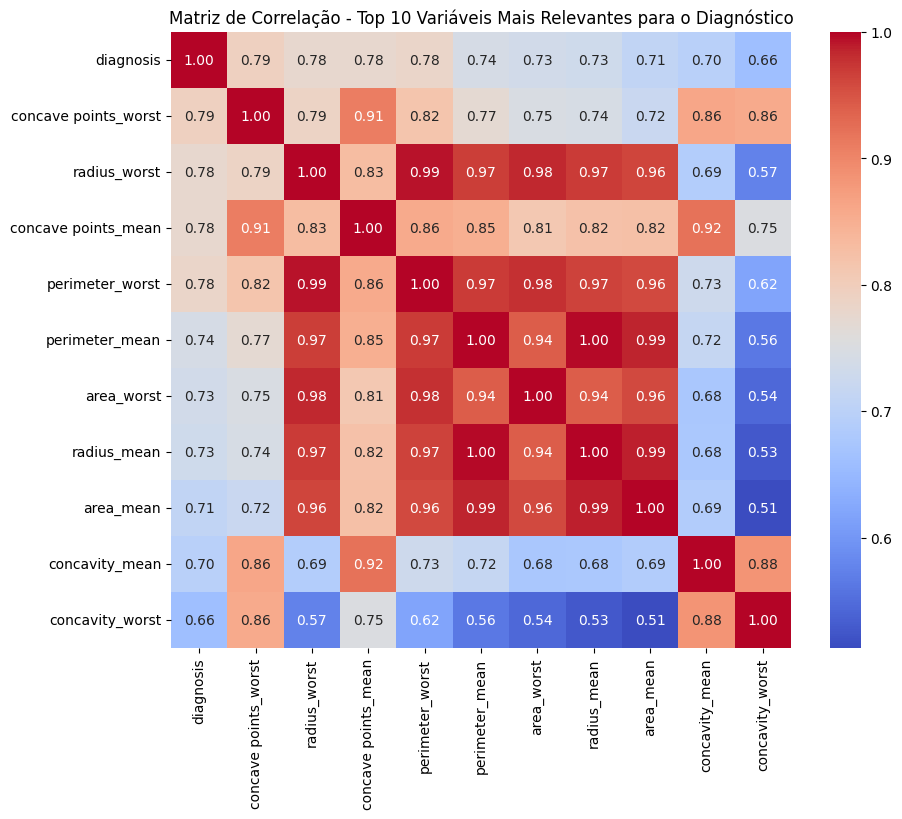

In [24]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
coluna = ['diagnosis']
label_encoder = LabelEncoder()
for col in coluna:
    df[col] = label_encoder.fit_transform(df[col])
corr_matrix = df.corr().round(2)

# Ordenar as correlações com o target
corr_with_target = corr_matrix['diagnosis'].sort_values(ascending=False)
print("Correlação das variáveis com o target (diagnosis):")
print(corr_with_target.head(15))

# --- Selecionar top 10 variáveis mais correlacionadas ---
top_features = corr_with_target[0:11]  # exclui a própria diagnosis

# --- Plotar a matriz de correlação dessas variáveis ---
plt.figure(figsize=(10, 8))
sns.heatmap(df[top_features.index].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação - Top 10 Variáveis Mais Relevantes para o Diagnóstico', fontsize=12)
plt.show()

In [25]:
print(df['diagnosis'].unique())
print(df['diagnosis'].value_counts())

[1 0]
diagnosis
0    357
1    212
Name: count, dtype: int64


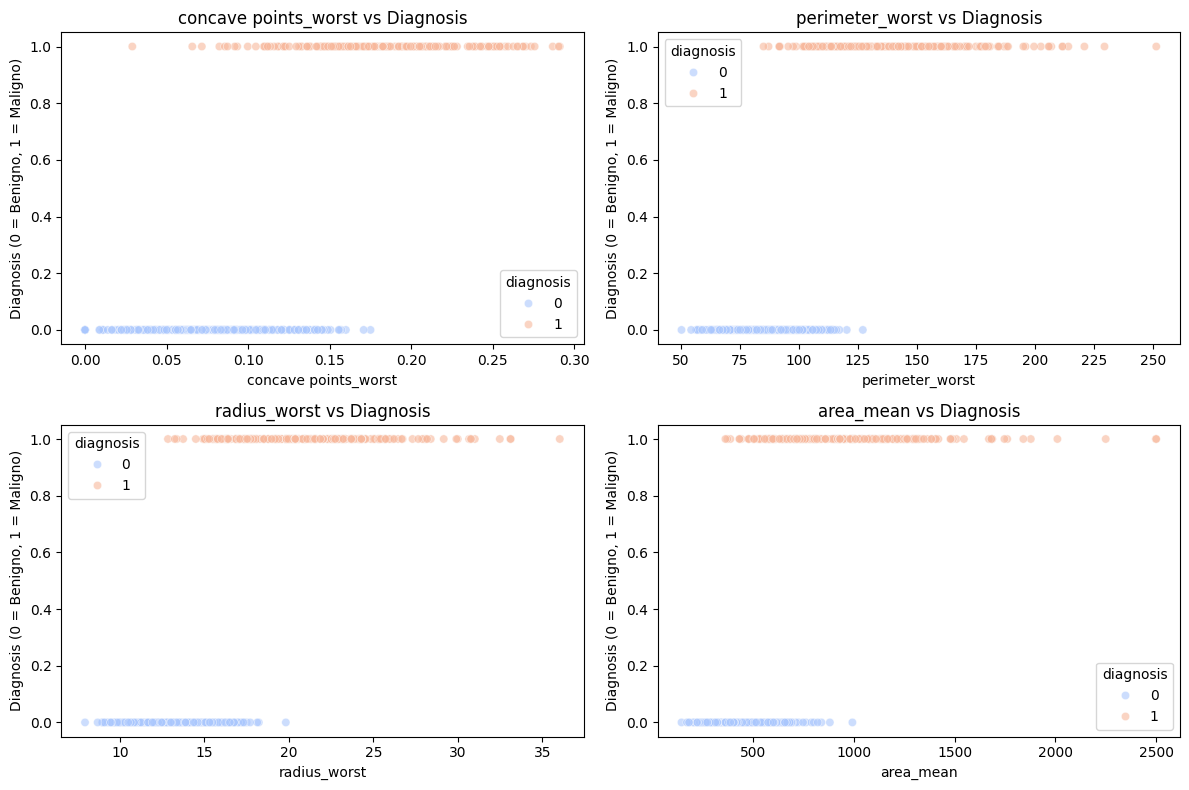

In [26]:
# Selecionar algumas variáveis mais correlacionadas com o diagnóstico
top_vars = ['concave points_worst', 'perimeter_worst', 'radius_worst', 'area_mean']

# Plotar gráficos de dispersão para cada variável vs diagnosis
plt.figure(figsize=(12, 8))
for i, var in enumerate(top_vars, 1):
    plt.subplot(2, 2, i)  # cria uma grade 2x2 de gráficos
    sns.scatterplot(x=var, y='diagnosis', data=df, alpha=0.6, hue='diagnosis', palette='coolwarm')
    plt.title(f'{var} vs Diagnosis')
    plt.xlabel(var)
    plt.ylabel('Diagnosis (0 = Benigno, 1 = Maligno)')

plt.tight_layout()
plt.show()

In [27]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [28]:
df['Unnamed: 32'].unique()

array([nan])

In [29]:
df = df.drop(columns=['Unnamed: 32'])

In [30]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [31]:
df = df.drop(columns=['id', 'Unnamed: 32'], errors='ignore')
# --- Separar features (X) e target (y) ---
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# --- Normalizar os dados ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Dividir em treino e teste ---
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# --- Treinar o modelo KNN ---
knn = KNeighborsClassifier(n_neighbors=5)  # você pode ajustar o número de vizinhos
knn.fit(X_train, y_train)

# --- Fazer previsões ---
y_pred = knn.predict(X_test)

# --- Avaliar o modelo ---
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

Acurácia: 0.956140350877193

Matriz de Confusão:
 [[71  1]
 [ 4 38]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [32]:
train_accuracy = knn.score(X_train, y_train)
test_accuracy = knn.score(X_test, y_test)

print(f"Acurácia no treino: {train_accuracy:.4f}")
print(f"Acurácia no teste: {test_accuracy:.4f}")

Acurácia no treino: 0.9780
Acurácia no teste: 0.9561


In [33]:
    list(y_train).count(1)

170

In [34]:
list(y_train).count(0)

285

In [35]:
print(X.shape)
print(X.columns)

(569, 30)
Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [37]:
import pandas as pd

caso_maligno = {
    'radius_mean': 20.1,
    'texture_mean': 23.5,
    'perimeter_mean': 132.5,
    'area_mean': 1300.0,
    'smoothness_mean': 0.095,
    'compactness_mean': 0.160,
    'concavity_mean': 0.240,
    'concave points_mean': 0.125,
    'symmetry_mean': 0.180,
    'fractal_dimension_mean': 0.060,
    'radius_se': 1.30,
    'texture_se': 1.00,
    'perimeter_se': 8.0,
    'area_se': 50.0,
    'smoothness_se': 0.006,
    'compactness_se': 0.025,
    'concavity_se': 0.035,
    'concave points_se': 0.012,
    'symmetry_se': 0.020,
    'fractal_dimension_se': 0.003,
    'radius_worst': 24.0,
    'texture_worst': 29.5,
    'perimeter_worst': 160.0,
    'area_worst': 1800.0,
    'smoothness_worst': 0.120,
    'compactness_worst': 0.275,
    'concavity_worst': 0.310,
    'concave points_worst': 0.180,
    'symmetry_worst': 0.260,
    'fractal_dimension_worst': 0.085
}

caso_benigno = {
    'radius_mean': 11.5,
    'texture_mean': 14.8,
    'perimeter_mean': 75.0,
    'area_mean': 410.0,
    'smoothness_mean': 0.090,
    'compactness_mean': 0.070,
    'concavity_mean': 0.045,
    'concave points_mean': 0.020,
    'symmetry_mean': 0.170,
    'fractal_dimension_mean': 0.065,
    'radius_se': 0.30,
    'texture_se': 0.60,
    'perimeter_se': 2.0,
    'area_se': 15.0,
    'smoothness_se': 0.003,
    'compactness_se': 0.008,
    'concavity_se': 0.007,
    'concave points_se': 0.002,
    'symmetry_se': 0.008,
    'fractal_dimension_se': 0.001,
    'radius_worst': 13.0,
    'texture_worst': 17.0,
    'perimeter_worst': 85.0,
    'area_worst': 520.0,
    'smoothness_worst': 0.110,
    'compactness_worst': 0.100,
    'concavity_worst': 0.080,
    'concave points_worst': 0.040,
    'symmetry_worst': 0.200,
    'fractal_dimension_worst': 0.070
}


# Criar DataFrames
df_maligno = pd.DataFrame([caso_maligno])
df_benigno = pd.DataFrame([caso_benigno])

# Padronizar com o mesmo scaler
X_maligno = scaler.transform(df_maligno)
X_benigno = scaler.transform(df_benigno)

# Fazer previsões
print("Benigno ->", "DOENTE" if knn.predict(X_benigno)[0] == 1 else "NÃO DOENTE")
print("Maligno ->", "DOENTE" if knn.predict(X_maligno)[0] == 1 else "NÃO DOENTE")

Benigno -> NÃO DOENTE
Maligno -> DOENTE


In [38]:
# --- Treinar o modelo Árvore de Decisão ---
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
print('Árvore de Decisão treinada')


Árvore de Decisão treinada


In [39]:
# --- Fazer previsões ---
y_pred = tree_model.predict(X_test)

# --- Avaliar o modelo ---
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

Acurácia: 0.9298245614035088

Matriz de Confusão:
 [[68  4]
 [ 4 38]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        72
           1       0.90      0.90      0.90        42

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



In [40]:
train_accuracy = tree_model.score(X_train, y_train)
test_accuracy = tree_model.score(X_test, y_test)

print(f"Acurácia no treino: {train_accuracy:.4f}")
print(f"Acurácia no teste: {test_accuracy:.4f}")

Acurácia no treino: 1.0000
Acurácia no teste: 0.9298


In [41]:
import pandas as pd

novo_exemplo_ben_df = {
    'radius_mean': 14.5,
    'texture_mean': 20.2,
    'perimeter_mean': 95.0,
    'area_mean': 600.0,
    'smoothness_mean': 0.102,
    'compactness_mean': 0.14,
    'concavity_mean': 0.18,
    'concave points_mean': 0.09,
    'symmetry_mean': 0.18,
    'fractal_dimension_mean': 0.06,
    'radius_se': 0.25,
    'texture_se': 1.1,
    'perimeter_se': 2.5,
    'area_se': 20.0,
    'smoothness_se': 0.005,
    'compactness_se': 0.04,
    'concavity_se': 0.04,
    'concave points_se': 0.02,
    'symmetry_se': 0.02,
    'fractal_dimension_se': 0.005,
    'radius_worst': 15.0,
    'texture_worst': 25.0,
    'perimeter_worst': 100.0,
    'area_worst': 700.0,
    'smoothness_worst': 0.12,
    'compactness_worst': 0.25,
    'concavity_worst': 0.30,
    'concave points_worst': 0.15,
    'symmetry_worst': 0.20,
    'fractal_dimension_worst': 0.08
}

novo_exemplo_mal_df = {
    'radius_mean': 20.5,
    'texture_mean': 22.4,
    'perimeter_mean': 135.0,
    'area_mean': 1320.0,
    'smoothness_mean': 0.103,
    'compactness_mean': 0.180,
    'concavity_mean': 0.250,
    'concave points_mean': 0.135,
    'symmetry_mean': 0.190,
    'fractal_dimension_mean': 0.060,
    'radius_se': 1.10,
    'texture_se': 0.90,
    'perimeter_se': 8.50,
    'area_se': 50.0,
    'smoothness_se': 0.006,
    'compactness_se': 0.025,
    'concavity_se': 0.035,
    'concave points_se': 0.012,
    'symmetry_se': 0.020,
    'fractal_dimension_se': 0.003,
    'radius_worst': 24.5,
    'texture_worst': 29.5,
    'perimeter_worst': 162.0,
    'area_worst': 1850.0,
    'smoothness_worst': 0.120,
    'compactness_worst': 0.280,
    'concavity_worst': 0.320,
    'concave points_worst': 0.185,
    'symmetry_worst': 0.265,
    'fractal_dimension_worst': 0.085
}

# Criar DataFrames
df_teste_tree = pd.DataFrame([novo_exemplo_ben_df])
df_teste_tree1 = pd.DataFrame([novo_exemplo_mal_df])

df_teste_tree = df_teste_tree[X.columns]
df_teste_tree1 = df_teste_tree1[X.columns]

# Padronizar com o mesmo scaler
df_teste_tree_scaled = scaler.transform(df_teste_tree)
df_teste_tree1_scaled = scaler.transform(df_teste_tree1)

# Fazer previsões
print("Benigno ->", "DOENTE" if tree_model.predict(df_teste_tree_scaled)[0] == 1 else "NÃO DOENTE")
print("Maligno ->", "DOENTE" if tree_model.predict(df_teste_tree1_scaled)[0] == 1 else "NÃO DOENTE")

Benigno -> NÃO DOENTE
Maligno -> DOENTE
